In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/corona_tested_individuals_ver_0083.english.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [ ]:
df.describe

<bound method NDFrame.describe of           test_date  cough  fever  sore_throat  shortness_of_breath  \
0        2020-11-12      0      0            0                    0   
1        2020-11-12      0      1            0                    0   
2        2020-11-12      0      0            0                    0   
3        2020-11-12      0      0            0                    0   
4        2020-11-12      0      1            0                    0   
...             ...    ...    ...          ...                  ...   
2742591  2020-03-11      0      0            0                    0   
2742592  2020-03-11      0      0            0                    0   
2742593  2020-03-11      0      0            0                    0   
2742594  2020-03-11      0      0            0                    0   
2742595  2020-03-11      0      1            0                    0   

         head_ache corona_result age_60_and_above  gender  \
0                0      negative               No   

In [ ]:
df.info()
#df.dropna(inplace=True)
df1 =pd.DataFrame()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


In [ ]:
df['cough'].value_counts()

0    2631258
1     111338
Name: cough, dtype: int64

In [ ]:
df = df[df.cough != "None"]
df = df[df.fever != "None"]

In [ ]:
df = df.astype({'cough': int,'fever': int,'sore_throat': int,'head_ache': int, 'shortness_of_breath': int})


In [ ]:
df.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [ ]:
df['test_indication'].value_counts()

Other                     2547559
Contact with confirmed     170742
Abroad                      24295
Name: test_indication, dtype: int64

In [ ]:
df['corona_result'].value_counts()

negative    2480403
positive     220975
other         41218
Name: corona_result, dtype: int64

In [ ]:
df['age_60_and_above'].value_counts()

No     1908553
Yes     286399
Name: age_60_and_above, dtype: int64

In [ ]:
df['age_60_and_above'] = df['age_60_and_above'].map({'No':0, 'Yes':1})

In [ ]:
df['Result'] = df['corona_result'].map({'negative':0, 'positive':1})
df2 =pd.get_dummies(df['test_indication'])
df = pd.concat([df, df2],axis=1)

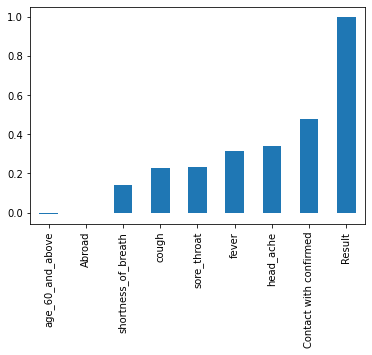

In [ ]:
df.corr()["Result"][:-1].sort_values().plot(kind='bar')

In [ ]:
df.corr()['Result'].sort_values()

Other                    -0.447394
age_60_and_above         -0.008201
Abroad                    0.000557
shortness_of_breath       0.140696
cough                     0.229705
sore_throat               0.234604
fever                     0.312183
head_ache                 0.339869
Contact with confirmed    0.476043
Result                    1.000000
Name: Result, dtype: float64

In [ ]:
df.dropna(inplace=True)
df.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication', 'Result', 'Abroad', 'Contact with confirmed',
       'Other'],
      dtype='object')

In [ ]:
df.to_csv('/content/sample_data/Corona_PreProcessed2.csv')

In [ ]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,Result,Abroad,Contact with confirmed,Other
0,2020-11-12,0,0,0,0,0,negative,0.0,male,Other,0.0,0,0,1
1,2020-11-12,0,1,0,0,0,negative,0.0,male,Other,0.0,0,0,1
2,2020-11-12,0,0,0,0,0,negative,1.0,female,Other,0.0,0,0,1
3,2020-11-12,0,0,0,0,0,negative,0.0,male,Other,0.0,0,0,1
4,2020-11-12,0,1,0,0,0,negative,0.0,male,Contact with confirmed,0.0,0,1,0


In [ ]:
df.isna().sum()

test_date                 0
cough                     0
fever                     0
sore_throat               0
shortness_of_breath       0
head_ache                 0
corona_result             0
age_60_and_above          0
gender                    0
test_indication           0
Result                    0
Abroad                    0
Contact with confirmed    0
Other                     0
dtype: int64

In [ ]:
df[df['fever'].isna()]

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,Result,Abroad,Contact with confirmed,Other


In [ ]:
df.shape

(2151898, 14)

In [ ]:
df.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(['Result','corona_result','gender','test_indication','Other','test_date'],axis=1).values
y=df["Result"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
df3=df

In [ ]:
df3.drop(['Result','corona_result','gender','test_indication','Other','test_date'],axis=1)

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,Abroad,Contact with confirmed
0,0,0,0,0,0,0.0,0,0
1,0,1,0,0,0,0.0,0,0
2,0,0,0,0,0,1.0,0,0
3,0,0,0,0,0,0.0,0,0
4,0,1,0,0,0,0.0,0,1
...,...,...,...,...,...,...,...,...
2731639,1,1,1,1,1,0.0,0,1
2731640,0,0,0,0,0,0.0,0,0
2731643,1,0,0,0,0,0.0,0,1
2731644,0,0,0,0,0,0.0,0,0


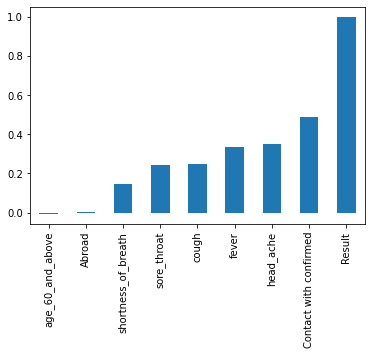

In [ ]:
df3.corr()["Result"][:-1].sort_values().plot(kind='bar')

In [ ]:
df3.corr()['Result'].sort_values()

Other                    -0.464658
age_60_and_above         -0.008315
Abroad                    0.001057
shortness_of_breath       0.146058
sore_throat               0.241608
cough                     0.250416
fever                     0.333620
head_ache                 0.351005
Contact with confirmed    0.486615
Result                    1.000000
Name: Result, dtype: float64

Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
error= []
# Will take some time
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
pred_i = rfc.predict(X_test)
error.append(np.mean(pred_i != y_test))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score

In [ ]:
print(classification_report(y_test,pred_i))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96    583068
         1.0       0.64      0.61      0.63     62502

    accuracy                           0.93    645570
   macro avg       0.80      0.79      0.79    645570
weighted avg       0.93      0.93      0.93    645570



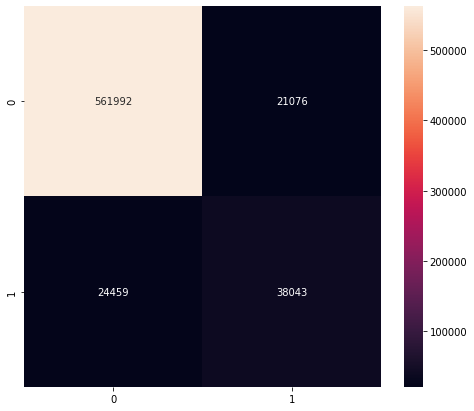

In [ ]:
CM = confusion_matrix(y_test,pred_i)

import seaborn as sns
import matplotlib.pyplot as plt

# labels = ['0', '1']

fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(CM, annot=True, fmt=".0f")

Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
error= []
# Will take some time
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred_i = lr.predict(X_test)
error.append(np.mean(pred_i != y_test))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score

In [ ]:
print(classification_report(y_test,pred_i))


              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96    583068
         1.0       0.71      0.29      0.42     62502

    accuracy                           0.92    645570
   macro avg       0.82      0.64      0.69    645570
weighted avg       0.91      0.92      0.90    645570



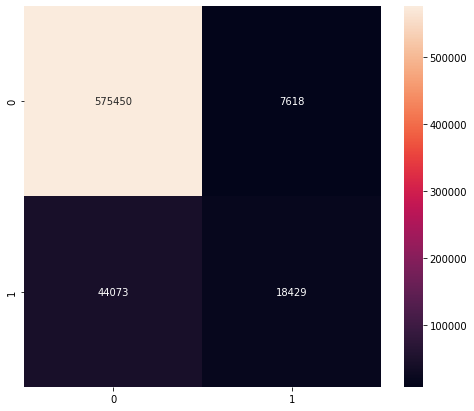

In [ ]:
CM = confusion_matrix(y_test,pred_i)

import seaborn as sns
import matplotlib.pyplot as plt

# labels = ['0', '1']

fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(CM, annot=True, fmt=".0f")

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [ ]:
error= []
# Will take some time
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_i = dt.predict(X_test)
error.append(np.mean(pred_i != y_test))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score

In [ ]:
print(classification_report(y_test,pred_i))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96    583068
         1.0       0.64      0.61      0.63     62502

    accuracy                           0.93    645570
   macro avg       0.80      0.79      0.79    645570
weighted avg       0.93      0.93      0.93    645570



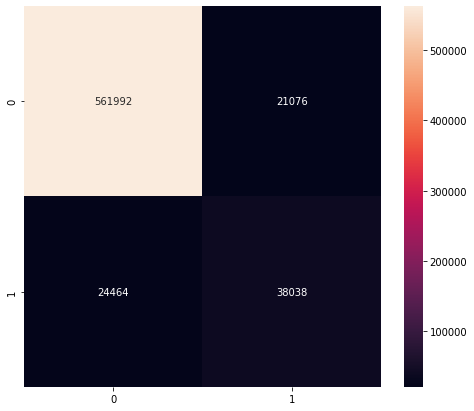

In [ ]:
CM = confusion_matrix(y_test,pred_i)

import seaborn as sns
import matplotlib.pyplot as plt

# labels = ['0', '1']

fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(CM, annot=True, fmt=".0f")

Gaussian


In [ ]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [ ]:
error= []
# Will take some time
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
pred_i = nb.predict(X_test)
error.append(np.mean(pred_i != y_test))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score

In [ ]:
print(classification_report(y_test,pred_i))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95    583068
         1.0       0.57      0.65      0.61     62502

    accuracy                           0.92    645570
   macro avg       0.76      0.80      0.78    645570
weighted avg       0.92      0.92      0.92    645570



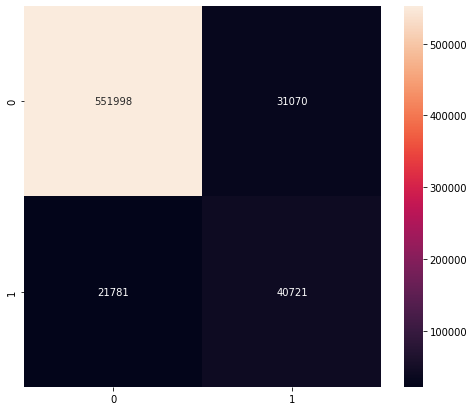

In [ ]:
CM = confusion_matrix(y_test,pred_i)

import seaborn as sns
import matplotlib.pyplot as plt

# labels = ['0', '1']

fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(CM, annot=True, fmt=".0f")

svc

In [ ]:
from sklearn.svm import SVC
import numpy as np

In [ ]:
error= []
# Will take some time
svc = SVC()
svc.fit(X_train,y_train)